In [1]:
import pandas as pd

red_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-red.csv'
white_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-white.csv'

red_wine = pd.read_csv(red_url, sep=';')
white_wine = pd.read_csv(white_url, sep=';')

red_wine['color'] = 1.
white_wine['color'] = 0.

wine = pd.concat([red_wine, white_wine])
wine['taste'] = [1. if grade>5 else 0. for grade in wine['quality']]

X = wine.drop(['taste', 'quality'], axis=1)
y = wine['taste']

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=13)

wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train, y_train)

y_pred_tr = wine_tree.predict(X_train)
y_pred_test = wine_tree.predict(X_test)

print('Train Acc : ', accuracy_score(y_train, y_pred_tr))
print('Test Acc : ', accuracy_score(y_test, y_pred_test))


Train Acc :  0.7294593034442948
Test Acc :  0.7161538461538461


In [3]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve)

print('Accuracy : ', accuracy_score(y_test, y_pred_test))
print('Recall : ', recall_score(y_test, y_pred_test))
print('Precision : ', precision_score(y_test, y_pred_test))
print('AUC Score : ', roc_auc_score(y_test, y_pred_test))
print('F1 Score : ', f1_score(y_test, y_pred_test))

Accuracy :  0.7161538461538461
Recall :  0.7314702308626975
Precision :  0.8026666666666666
AUC Score :  0.7105988470875331
F1 Score :  0.7654164017800381


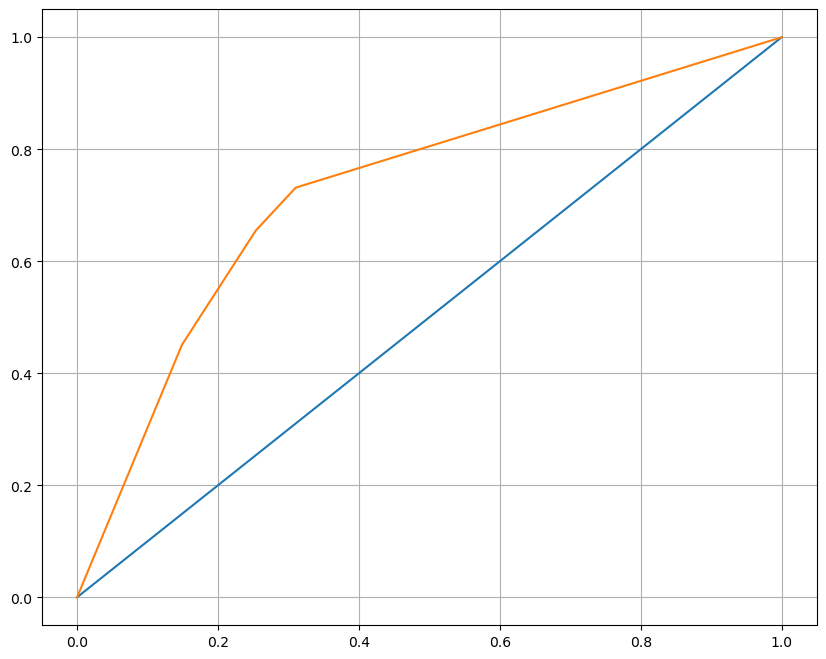

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

pred_proba = wine_tree.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, pred_proba)

plt.figure(figsize=(10,8))
plt.plot([0,1], [0,1])
plt.plot(fpr, tpr)
plt.grid()
plt.show()